## 2024 Economic Analysis with Python using Fred API ##

![2024 Economy Logo](https://www.promarket.org/wp-content/uploads/2024/01/Econ_Trends.jpg)




In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import time
from dotenv import load_dotenv

# Set plotting style and pandas display options
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]


from fredapi import Fred

# Retrieve your API key from environment variables
load_dotenv()
fred_key = os.getenv("API_KEY")


## 1. Obtain Fred Economic Data ##

In [3]:
fred = Fred(api_key=fred_key)

## 2. Search Economic Data ##

In [4]:
sp_search = fred.search('S&P', order_by='popularity')

In [5]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-04-29,2024-04-29,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-04-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-04-29 08:43:08-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-04-29,2024-04-29,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-01-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-03-26 08:11:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-04-29,2024-04-29,S&P 500,2014-04-28,2024-04-26,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-04-26 19:10:58-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-04-29,2024-04-29,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-04-29,2024-04-29,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-04-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-04-29 08:43:11-05:00,82,This data represents the effective yield of th...


## 3. Pulling S&P 500 Data from 2023 - 2024

<Axes: title={'center': 'S&P 500 (2023-2024)'}>

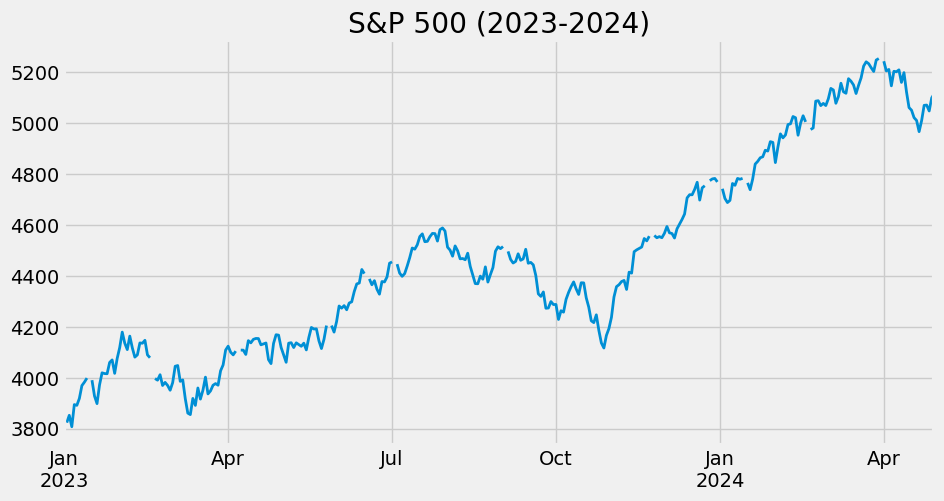

In [69]:
sp500 = fred.get_series(series_id='SP500', observation_start='2023-01-01', observation_end='2024-12-31')
sp500.plot(figsize=(10, 5), title='S&P 500 (2023-2024)', lw=2)

## 4. Merging Unemployment Rates by each state

In [33]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-04-29,2024-04-29,Unemployment Rate,1948-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-05 07:50:02-05:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-04-29,2024-04-29,Unemployment Rate - Black or African American,1972-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-05 07:50:16-05:00,72,The series comes from the 'Current Population ...
CAUR,CAUR,2024-04-29,2024-04-29,Unemployment Rate in California,1976-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-22 10:41:02-05:00,64,None
TXUR,TXUR,2024-04-29,2024-04-29,Unemployment Rate in Texas,1976-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-22 10:41:03-05:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2024-04-29,2024-04-29,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000048,LNS14000048,2024-04-29,2024-04-29,Unemployment Rate - 25 Yrs. & over,1948-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-05 07:51:30-05:00,6,The series comes from the 'Current Population ...
LNS14000089,LNS14000089,2024-04-29,2024-04-29,Unemployment Rate - 25-34 Yrs.,1948-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-05 07:51:34-05:00,6,The series comes from the 'Current Population ...
M08311USM156SNBR,M08311USM156SNBR,2024-04-29,2024-04-29,"Unemployment Rate, Married Males, Spouse Prese...",1954-11-01,1968-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:28:17-05:00,6,Beginning In 1960 Data Include Alaska And Hawa...


In [97]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1)
unemp_results = pd.concat(all_results, axis=1).drop(['M08311USM156SNBR', 'M0892AUSM156SNBR'], axis=1)

In [98]:
cols_to_drop = []
for i in unemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
unemp_results = unemp_results.drop(columns = cols_to_drop, axis=1)

In [101]:
unemp_states = unemp_results.copy()
unemp_states = unemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]
unemp_states = unemp_states.drop(columns=[col for col in unemp_states.columns if "Puerto Rico" in col], axis=1)

In [107]:
## Plotting unemployment rates per state
unemp_long = unemp_states.reset_index().melt(id_vars='index', var_name='State', value_name='Unemployment Rate')
unemp_long = unemp_long.rename(columns={'index': 'Date'})

# Now, create the plot with Plotly Express
fig = px.line(
    unemp_long, 
    x='Date', 
    y='Unemployment Rate', 
    color='State',
    title='State-wise Employment Rates (2023-2024)',
    labels={'Unemployment Rate': 'Unemployment Rate (%)'}
)

fig.show()

## 5. Pull March 2024 Unemployment Rates Per State

In [104]:
unemp_states = unemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

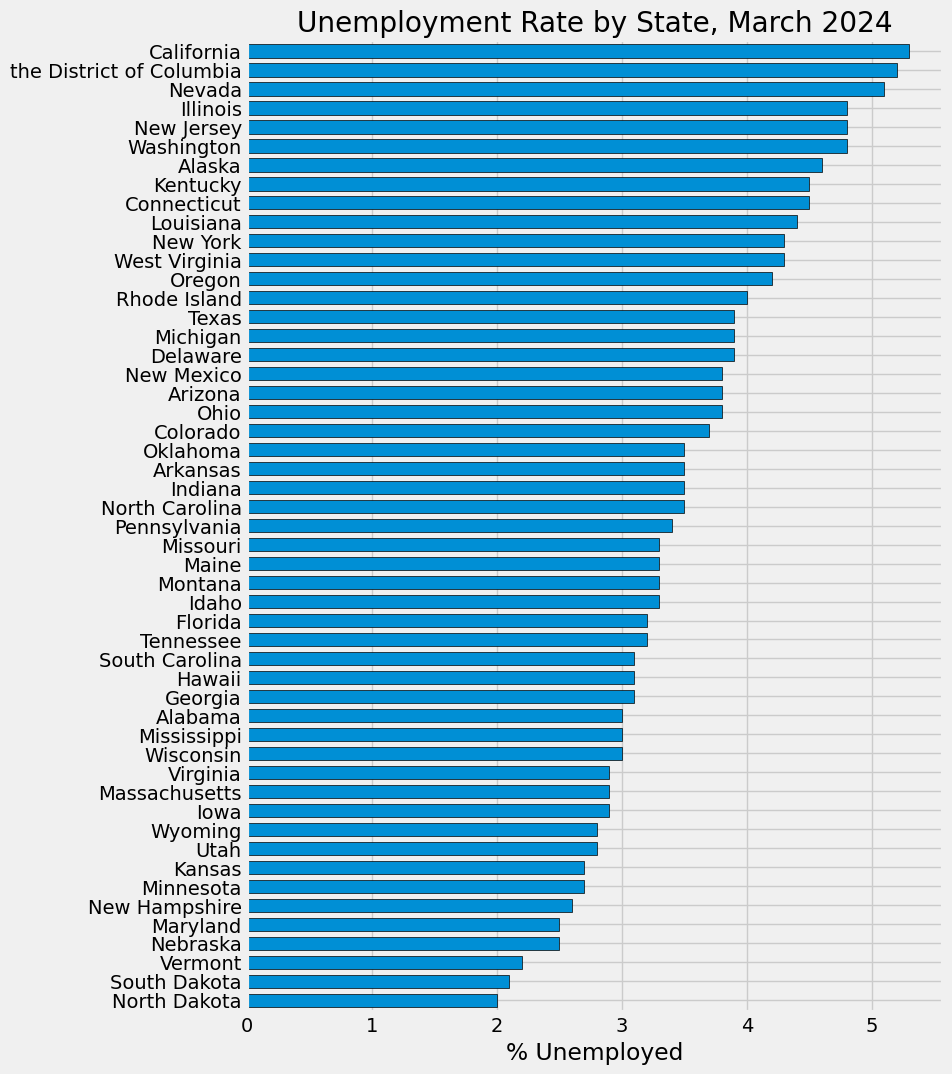

In [103]:
ax = unemp_states.loc[unemp_states.index == '2024-03-01'].T \
    .sort_values('2024-03-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, March 2024')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

## 6. Comparing PCE and Inflation rates from 2023 - 2024

In [89]:
# Fetch PCE data
pce_data = fred.get_series(series_id='PCE', observation_start='2023-01-01', observation_end='2024-12-31')
pce_percent_change = pce_data.pct_change(1) * 100

# Fetch Inflation Rate data (CPI)
inflation_data = fred.get_series(series_id='CPIAUCSL', observation_start='2023-01-01', observation_end='2024-12-31')
inflation_rate = inflation_data.pct_change(1) * 100

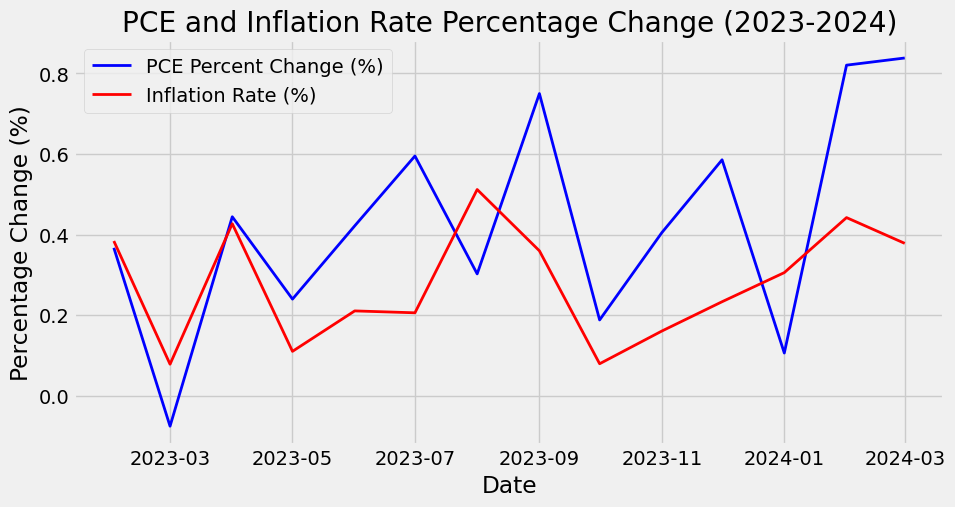

In [90]:
# Plotting the PCE percentage change and inflation rate
plt.figure(figsize=(10, 5))
plt.plot(pce_percent_change.index, pce_percent_change, label='PCE Percent Change (%)', color='blue', lw=2)
plt.plot(inflation_rate.index, inflation_rate, label='Inflation Rate (%)', color='red', lw=2)

# Title and labels
plt.title('PCE and Inflation Rate Percentage Change (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')

# Add grid and legend
plt.grid(visible=True)
plt.legend()

# Show the plot
plt.show()